# EXTRA TREE CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('CHURN.csv')

del df['RowNumber']
del df['CustomerId']
del df['Surname']
del df['Geography']


df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Gender']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [8]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [9]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
x1 = df.drop(labels='Exited', axis=1)
y1 = df.loc[:,'Exited']

In [12]:
#import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 7963, 1: 2037})
OVER SAMPLING DATA COUNT  :  Counter({1: 7963, 0: 7963})


In [13]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,0,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
15921,677,1,28,0,143988.00,2,1,0,8755.69
15922,704,0,39,1,124640.51,1,1,0,116511.12
15923,418,0,46,9,0.00,1,1,1,81014.50
15924,646,1,32,8,105397.80,1,1,0,78111.84


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  12740
NUMBER OF TEST DATASET      :  3186
TOTAL NUMBER OF DATASET    :  15926


In [15]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  12740
NUMBER OF TEST DATASET      :  3186
TOTAL NUMBER OF DATASET    :  15926


In [16]:
from sklearn.tree import ExtraTreeClassifier

In [17]:
ETC = ExtraTreeClassifier()
ETC.fit(x_train,y_train)

ExtraTreeClassifier()

In [18]:
predicted = ETC.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER:

               precision    recall  f1-score   support

           0       0.96      0.82      0.89      1593
           1       0.85      0.97      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186



In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:


 [[1314  279]
 [  48 1545]]


In [21]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(ETC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [90.58380414 91.93092622 92.84144427 92.33908948 92.433281  ]


In [22]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS : 89.73634651600754


In [23]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS : 10.263653483992467


THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:


[[1314  279]
 [  48 1545]]


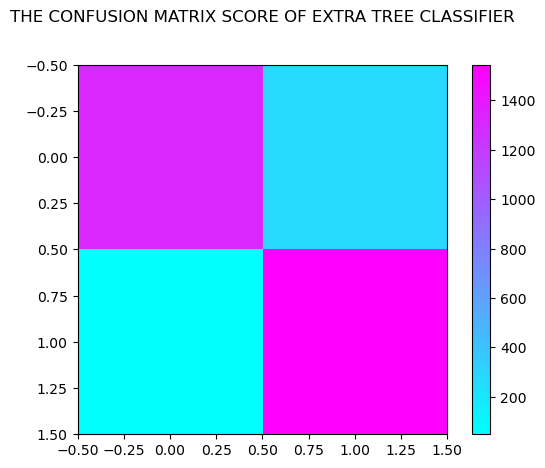

In [24]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

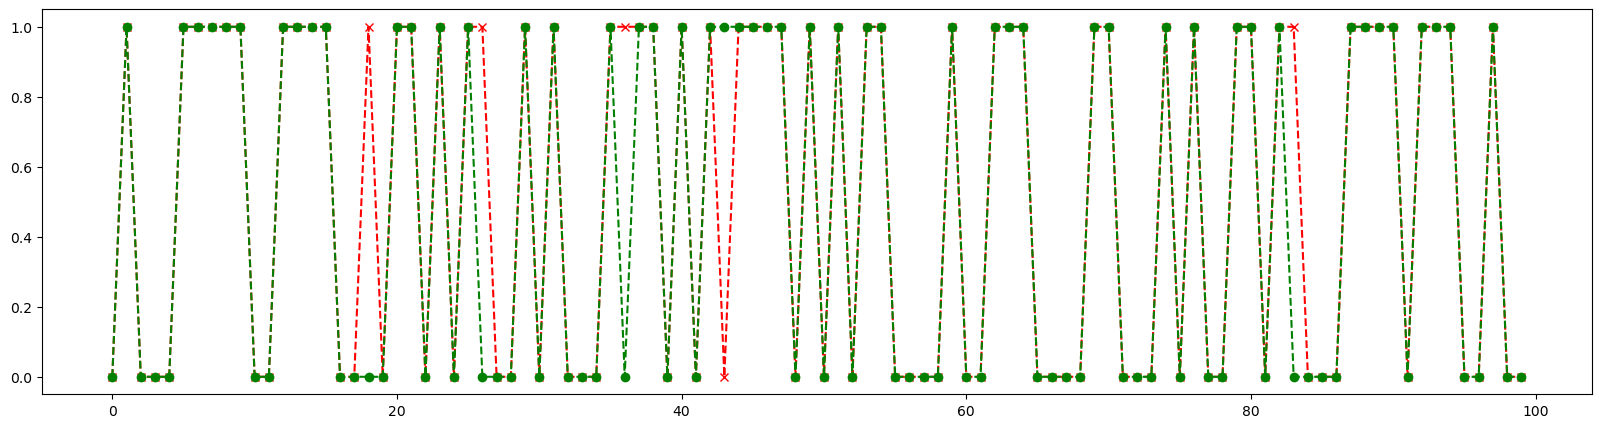

In [25]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [26]:
import joblib
joblib.dump(ETC, 'CHURN12.pkl')

['CHURN12.pkl']